In [73]:
%run SAT_help_functions.ipynb
#%matplotlib inline
from statannotations.Annotator import Annotator


## DDM Parameters

In [74]:
def transform_df_DDM(df_SAT):
    
    params = ["Drift Rate", "Boundary Separation", "Non-decision Time"]

    df_SAT1 = df_SAT[["Drift Rate Speed", "Boundary Separation Speed", "Non-decision Time Speed"]]
    df_SAT1 = pd.DataFrame(np.array(df_SAT1), columns = params)
    df_SAT1["SAT"] = ["Speed"]*len(df_SAT1)

    df_SAT2 = df_SAT[["Drift Rate Accuracy", "Boundary Separation Accuracy", "Non-decision Time Accuracy"]]
    df_SAT2 = pd.DataFrame(np.array(df_SAT2), columns = params)
    df_SAT2["SAT"] = ["Accuracy"]*len(df_SAT2)
    df_SAT = pd.concat((df_SAT1,df_SAT2))
    df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], 
                        value_vars=params,
                        var_name = "Parameter", value_name = "Value")
    return df_SAT_melted

In [75]:
def plot_dataset_DDM(dataset, dataset_name, ax=None, comparisons_correction = "bonferroni"):
    if ax is None:
        ax = plt.gca()
    df_SAT = pd.read_csv('Parameter Estimates/DDM2v2a2terresult'+dataset+'.csv')
    if dataset =='Wagenmakers2008':
        df_SAT = df_SAT.groupby(by="Participant").mean()
        
    df_SAT_melted = transform_df_DDM(df_SAT)

    params = ["Drift Rate", "Boundary Separation", "Non-decision Time"]
    DDMbox_pairs=[((p, "Speed"),(p, "Accuracy")) for p in params]


    #print(df_SAT_melted)
    sns.barplot(ax = ax, data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", hue_order=["Speed","Accuracy"],
               palette= ["#298c8c",'#800074'],alpha=.9)
    sns.stripplot(ax = ax, data=df_SAT_melted, x="Parameter", y="Value",hue = "SAT", palette=["#298c8c",'#800074'], 
                  alpha=.3,edgecolor="black",linewidth=1,size = 3, dodge=True)

    ax.legend_.remove()
    
    annotator = Annotator(ax, DDMbox_pairs, data=df_SAT_melted, x="Parameter", y="Value", hue="SAT")
    annotator.configure(test='t-test_paired', text_format='star',comparisons_correction="Bonferroni") #, loc='outside'
    annotator.apply_and_annotate()

    #if not ylabel:
    #    ax.set_ylabel(None, fontsize = 20)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(dataset_name[:-4] + " "+"("+dataset_name[-4:] + ")", weight='bold', fontsize = 24)
    ax.spines[['right', 'top']].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=14)

    #ax.tick_params(axis='x', rotation=5)
    
    return ax

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Boundary Separation_Speed vs. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.558e-06 t=-7.404e+00
Drift Rate_Speed vs. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.456e-02 t=-3.187e+00
Non-decision Time_Speed vs. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val:4.195e-06 t=-6.901e+00


<Axes: title={'center': 'Dutilh (2019)'}>

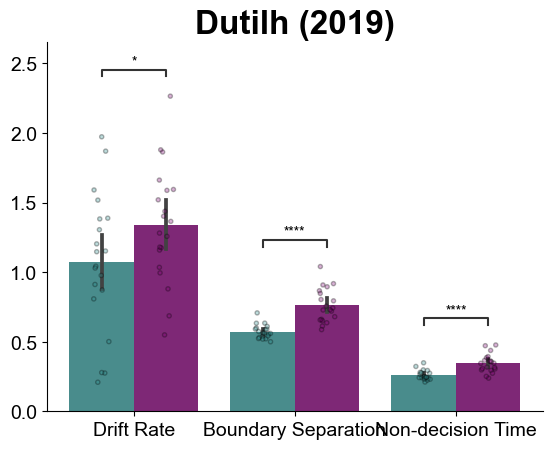

In [6]:
plot_dataset_DDM(dataset = "Dutilh2019", dataset_name = "Dutilh2019")

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Boundary Separation_Speed vs. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.199e-01 t=-2.144e+00
Drift Rate_Speed vs. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val:3.485e-04 t=-4.408e+00
Non-decision Time_Speed vs. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.781e-04 t=-4.644e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Boundary Separation_Speed vs. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.558e-06 t=-7.404e+00
Drift Rate_Speed vs. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.456e

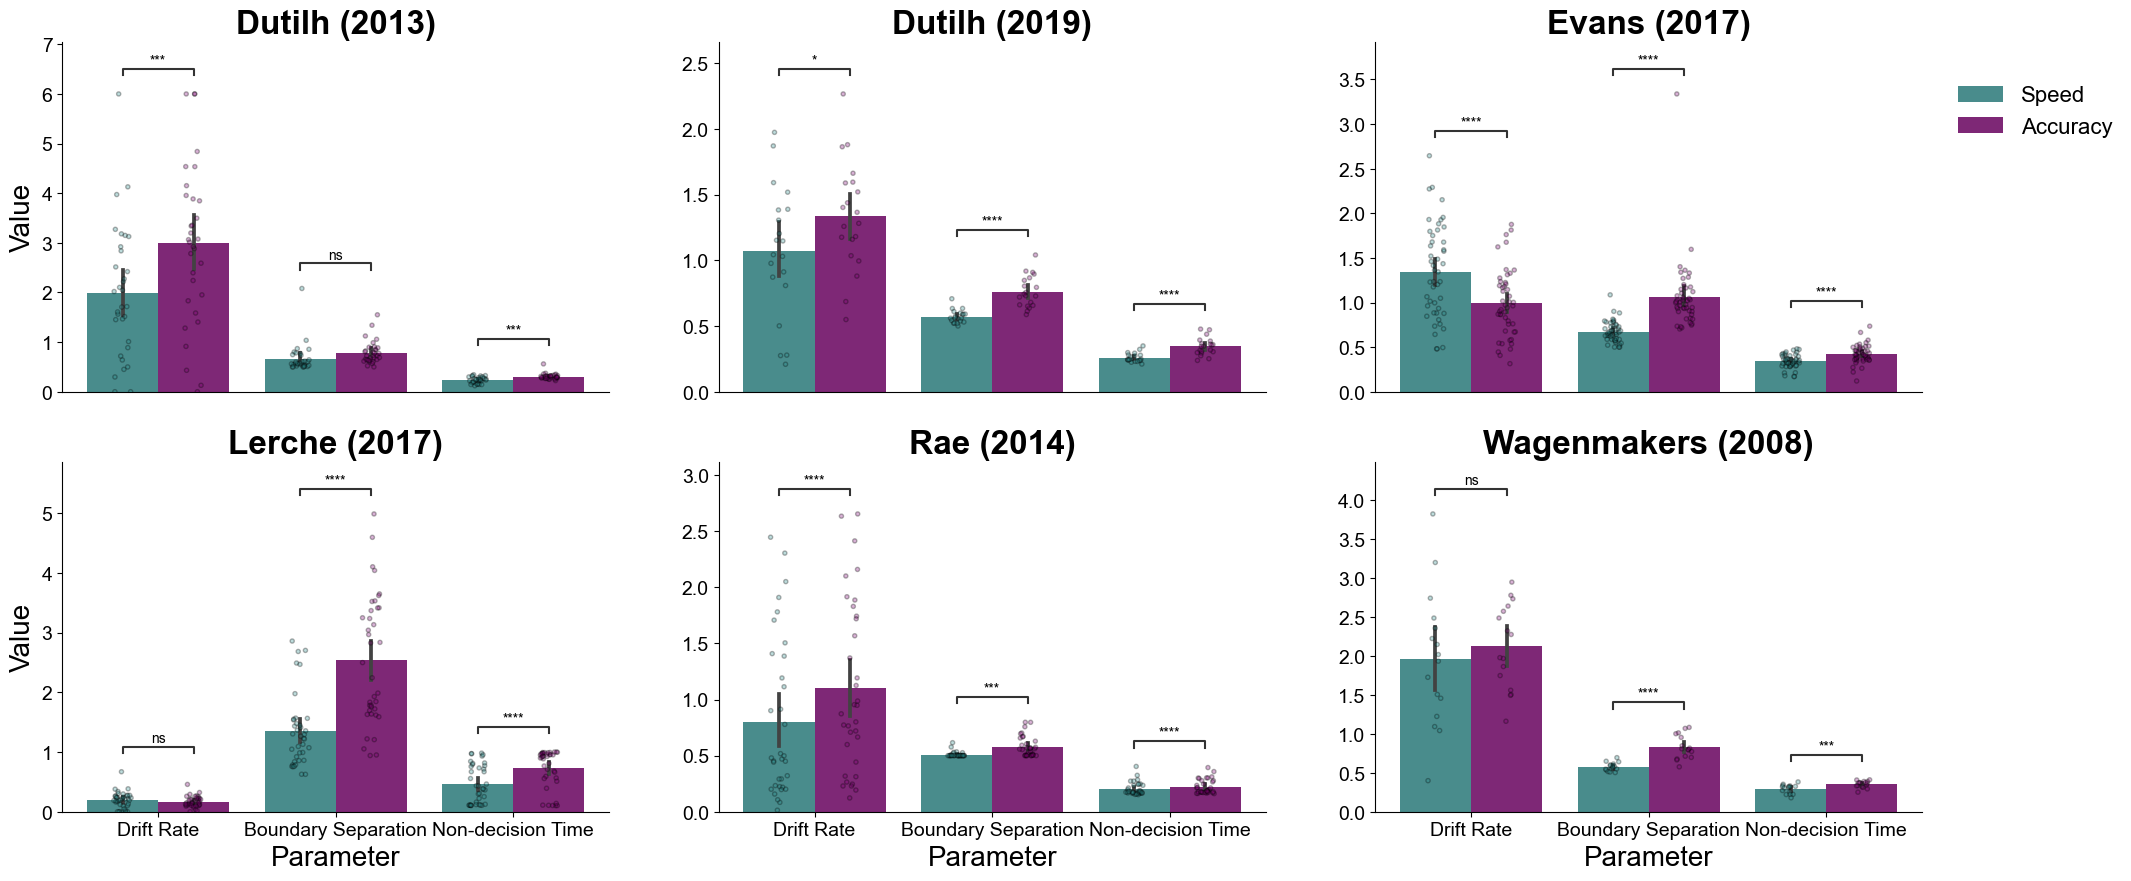

In [68]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']

fig, axes = plt.subplots(2,3,figsize=(24, 10))
for i in range(3):
    plot_dataset_DDM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[0,i])
    axes[0,i].tick_params(bottom = False,labelbottom = False)

for i in range(3,6):
    plot_dataset_DDM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[1,i-3])

axes[1,0].set_xlabel('Parameter', fontsize = 20)
axes[1,1].set_xlabel('Parameter', fontsize = 20)
axes[1,2].set_xlabel('Parameter', fontsize = 20)

axes[0,0].set_ylabel('Value', fontsize = 20)
axes[1,0].set_ylabel('Value', fontsize = 20)


# When creating the legend, only use the first two elements
handles, labels = axes[0,2].get_legend_handles_labels()
l = plt.legend(handles[2:4], labels[2:4], bbox_to_anchor=(1.05, 2.1), loc=2, borderaxespad=0.,fontsize=16, frameon=False)



plt.show()

## OUM parameters

In [15]:
def transform_df_OUM(df_SAT):
    
    params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Self-excitation"]

    df_SAT1 = df_SAT[["Drift Rate Speed", "Boundary Separation Speed", "Non-decision Time Speed", "Self-excitation Speed"]]
    df_SAT1 = pd.DataFrame(np.array(df_SAT1), columns = params)
    df_SAT1["SAT"] = ["Speed"]*len(df_SAT1)

    df_SAT2 = df_SAT[["Drift Rate Accuracy", "Boundary Separation Accuracy", "Non-decision Time Accuracy", "Self-excitation Accuracy"]]
    df_SAT2 = pd.DataFrame(np.array(df_SAT2), columns = params)
    df_SAT2["SAT"] = ["Accuracy"]*len(df_SAT2)
    df_SAT = pd.concat((df_SAT1,df_SAT2))
    df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], 
                        value_vars=params,
                        var_name = "Parameter", value_name = "Value")
    return df_SAT_melted
def plot_dataset_OUM(dataset, dataset_name, ax=None, comparisons_correction = "bonferroni"):
    if ax is None:
        ax = plt.gca()
    df_SAT = pd.read_csv('Parameter Estimates/OUM2v2a2k2terresult'+dataset+'.csv')
    if dataset =='Wagenmakers2008':
        df_SAT = df_SAT.groupby(by="Participant").mean()
    df_SAT_melted = transform_df_OUM(df_SAT)

    params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Self-excitation"]
    OUMbox_pairs=[((p, "Speed"),(p, "Accuracy")) for p in params]


    #print(df_SAT_melted)
    sns.barplot(ax = ax, data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", hue_order=["Speed","Accuracy"],
               palette= ["#298c8c",'#800074'],alpha=.9)
    sns.stripplot(ax = ax, data=df_SAT_melted, x="Parameter", y="Value",hue = "SAT", palette=["#298c8c",'#800074'], 
                  alpha=.3,edgecolor="black",linewidth=1,size = 3, dodge=True)
    ax.legend_.remove()
    
    annotator = Annotator(ax, OUMbox_pairs, data=df_SAT_melted, x="Parameter", y="Value", hue="SAT")
    annotator.configure(test='t-test_paired', text_format='star',comparisons_correction="Bonferroni") #, loc='outside'
    annotator.apply_and_annotate()
    
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(dataset_name[:-4] + " "+"("+dataset_name[-4:] + ")", weight='bold', fontsize = 24)
    ax.spines[['right', 'top']].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    return ax

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Boundary Separation_Speed vs. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.000e+00 t=1.057e+00
Drift Rate_Speed vs. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val:2.823e-04 t=-4.584e+00
Non-decision Time_Speed vs. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.585e-03 t=-3.971e+00
Self-excitation_Speed vs. Self-excitation_Accuracy: t-test paired samples with Bonferroni correction, P_val:3.440e-03 t=3.689e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Boundary Separation_Speed vs. Boundary Separation_Accuracy: t-test paired samples with Bonfe

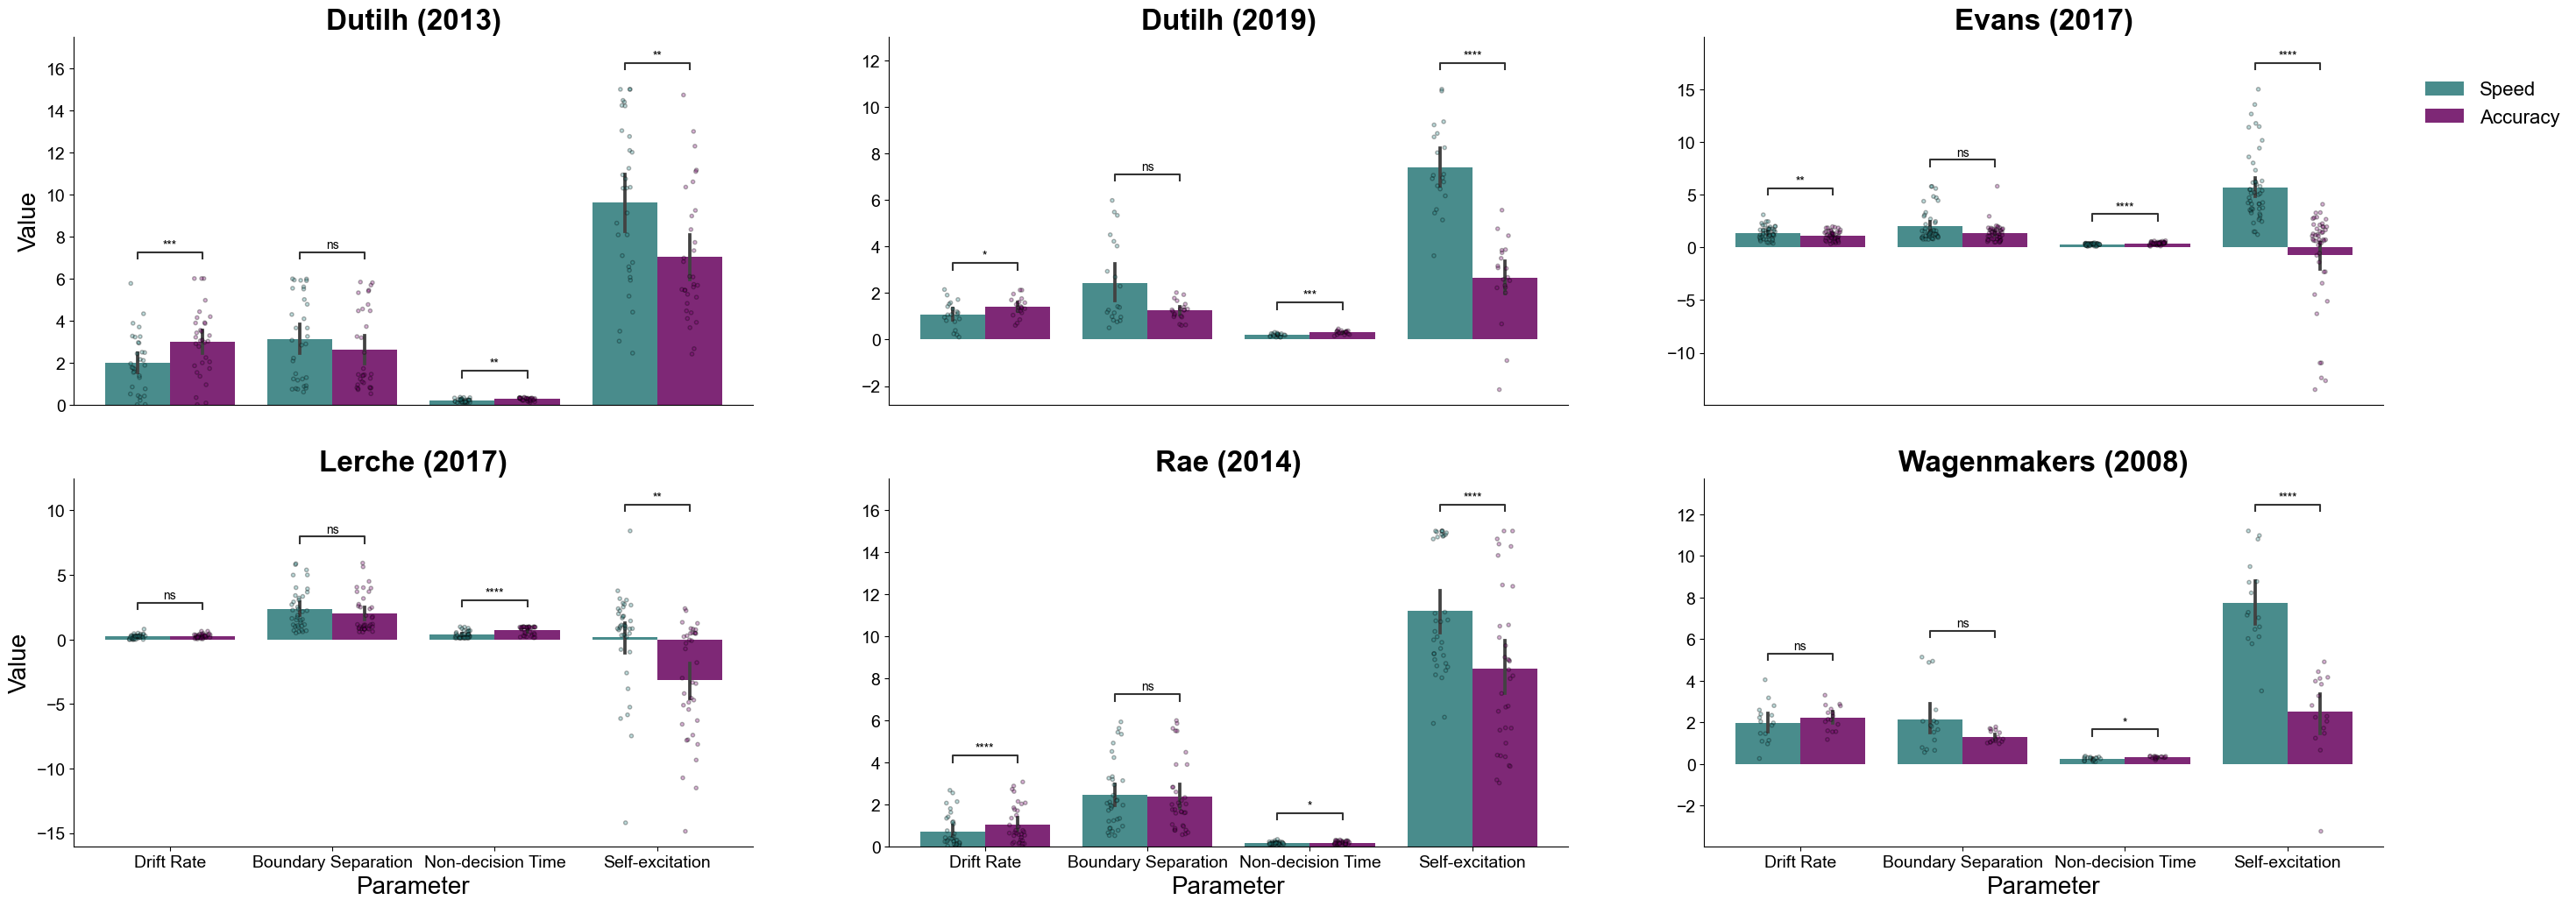

In [7]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']

fig, axes = plt.subplots(2,3,figsize=(34, 12))
for i in range(3):
    plot_dataset_OUM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[0,i])
    axes[0,i].tick_params(bottom = False,labelbottom = False)

for i in range(3,6):
    plot_dataset_OUM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[1,i-3])

axes[1,0].set_xlabel('Parameter', fontsize = 20)
axes[1,1].set_xlabel('Parameter', fontsize = 20)
axes[1,2].set_xlabel('Parameter', fontsize = 20)

axes[0,0].set_ylabel('Value', fontsize = 20)
axes[1,0].set_ylabel('Value', fontsize = 20)


# When creating the legend, only use the first two elements
handles, labels = axes[0,2].get_legend_handles_labels()
l = plt.legend(handles[2:4], labels[2:4], bbox_to_anchor=(1.05, 2.1), loc=2, borderaxespad=0.,fontsize=16, frameon=False)

plt.show()

## Linear CBM

In [18]:
def transform_df_LCBM(df_SAT):
    
    params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Collapse Rate"]

    df_SAT1 = df_SAT[["Drift Rate Speed", "BSpeed", "Non-decision Time Speed", "Collapse Speed"]]
    df_SAT1 = pd.DataFrame(np.array(df_SAT1), columns = params)
    df_SAT1["SAT"] = ["Speed"]*len(df_SAT1)

    df_SAT2 = df_SAT[["Drift Rate Accuracy", "BAcc", "Non-decision Time Accuracy", "Collapse Accuracy"]]
    df_SAT2 = pd.DataFrame(np.array(df_SAT2), columns = params)
    df_SAT2["SAT"] = ["Accuracy"]*len(df_SAT2)
    df_SAT = pd.concat((df_SAT1,df_SAT2))
    df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], value_vars=params,
                        var_name = "Parameter", value_name = "Value")
    return df_SAT_melted
def plot_dataset_LCBM(dataset, dataset_name, ax=None, comparisons_correction = "bonferroni"):
    if ax is None:
        ax = plt.gca()
    df_SAT = pd.read_csv('Parameter Estimates/DDM2v2a2c2terresult'+dataset+'.csv')
    #print(df_SAT)
    if dataset =='Wagenmakers2008':
        df_SAT = df_SAT.groupby(by="Participant").mean()
    df_SAT_melted = transform_df_LCBM(df_SAT)

    params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Collapse Rate"]
    OUMbox_pairs=[((p, "Speed"),(p, "Accuracy")) for p in params]


    #print(df_SAT_melted)
    sns.barplot(ax = ax, data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", hue_order=["Speed","Accuracy"],
               palette= ["#298c8c",'#800074'],alpha=.9)
    sns.stripplot(ax = ax, data=df_SAT_melted, x="Parameter", y="Value",hue = "SAT", palette=["#298c8c",'#800074'], 
                  alpha=.3,edgecolor="black",linewidth=1,size = 3, dodge=True)
    ax.legend_.remove()
    
    annotator = Annotator(ax, OUMbox_pairs, data=df_SAT_melted, x="Parameter", y="Value", hue="SAT")
    annotator.configure(test='t-test_paired', text_format='star',comparisons_correction="Bonferroni") #, loc='outside'
    annotator.apply_and_annotate()
    
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(dataset_name[:-4] + " "+"("+dataset_name[-4:] + ")", weight='bold', fontsize = 24)
    ax.spines[['right', 'top']].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    return ax

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Boundary Separation_Speed vs. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val:2.380e-01 t=-1.956e+00
Drift Rate_Speed vs. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val:7.829e-04 t=-4.223e+00
Non-decision Time_Speed vs. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val:2.261e-04 t=-4.662e+00
Collapse Rate_Speed vs. Collapse Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val:8.819e-01 t=-1.250e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Boundary Separation_Speed vs. Boundary Separation_Accuracy: t-test paired samples with Bonferr

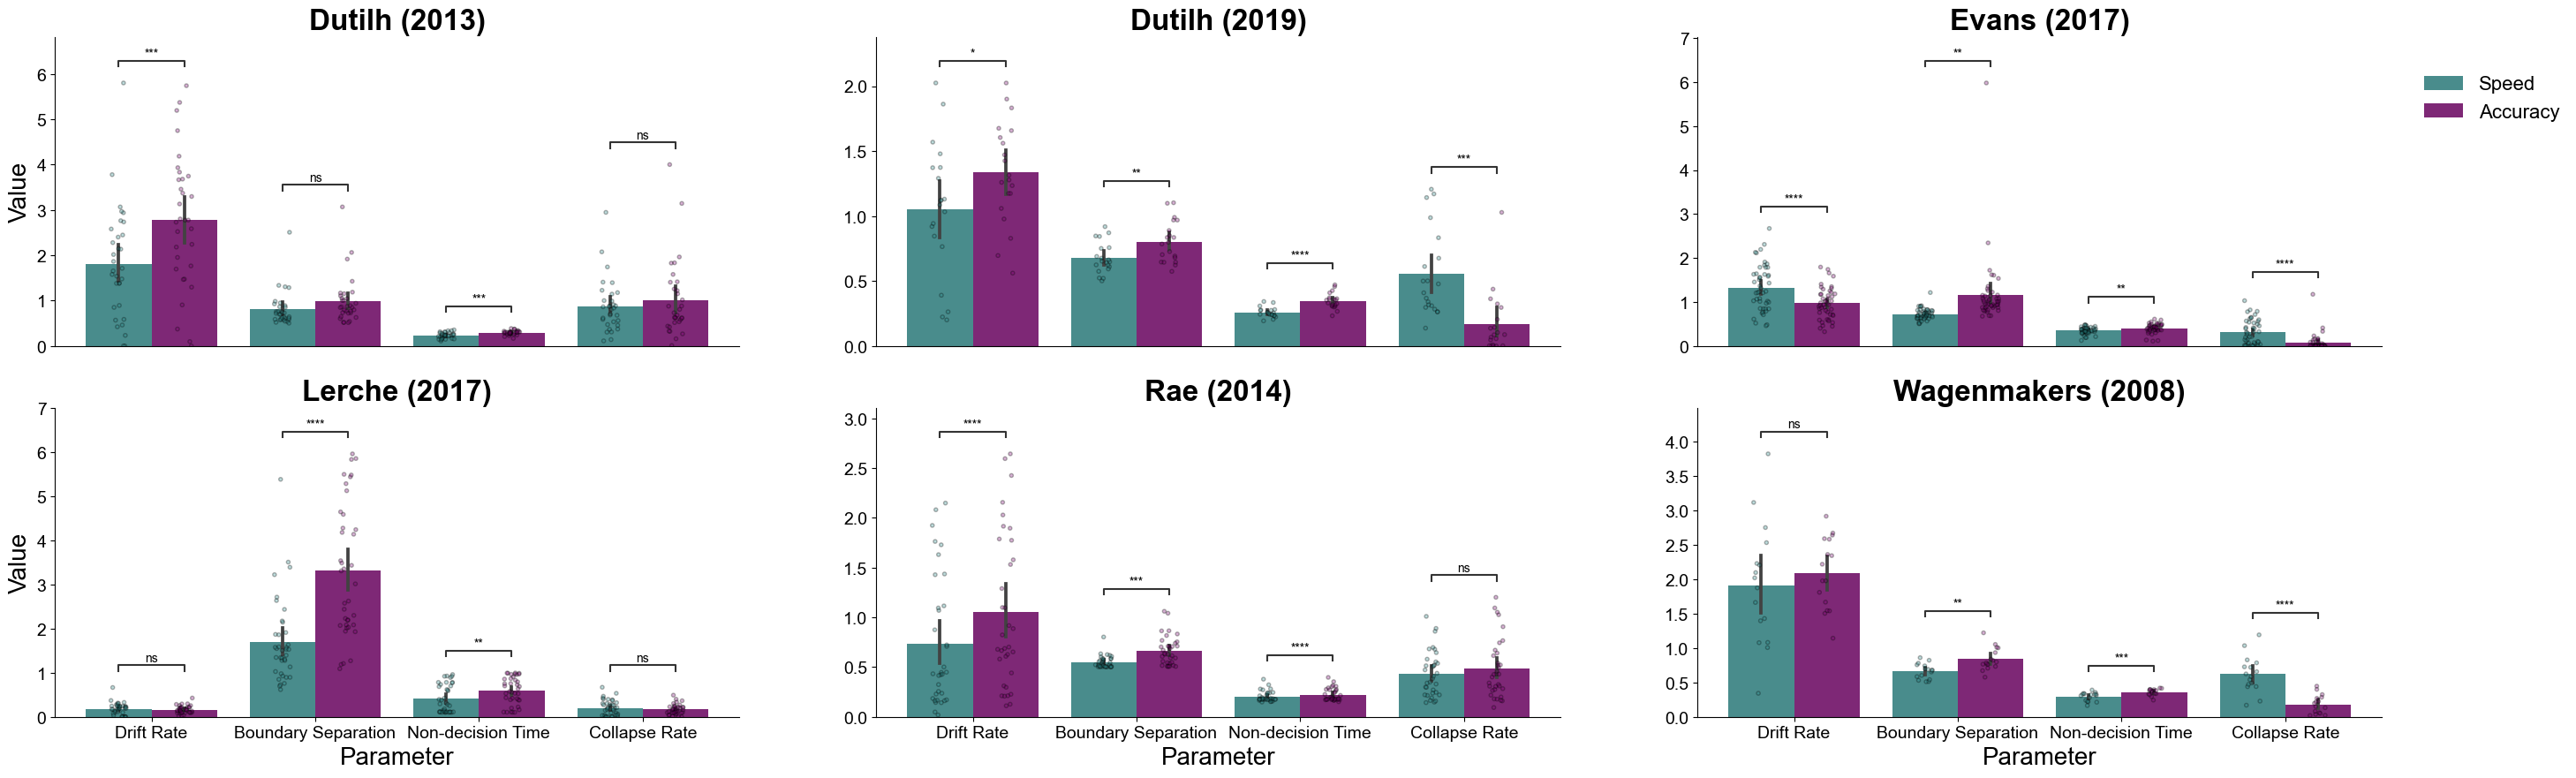

In [122]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']

fig, axes = plt.subplots(2,3,figsize=(34, 10))
for i in range(3):
    plot_dataset_LCBM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[0,i])
    axes[0,i].tick_params(bottom = False,labelbottom = False)

for i in range(3,6):
    plot_dataset_LCBM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[1,i-3])

axes[1,0].set_xlabel('Parameter', fontsize = 20)
axes[1,1].set_xlabel('Parameter', fontsize = 20)
axes[1,2].set_xlabel('Parameter', fontsize = 20)

axes[0,0].set_ylabel('Value', fontsize = 20)
axes[1,0].set_ylabel('Value', fontsize = 20)


# When creating the legend, only use the first two elements
handles, labels = axes[0,2].get_legend_handles_labels()
l = plt.legend(handles[2:4], labels[2:4], bbox_to_anchor=(1.05, 2.1), loc=2, borderaxespad=0.,fontsize=16, frameon=False)

plt.show()

In [ ]:
    # When creating the legend, only use the first two elements
    handles, labels = axes[0,2].get_legend_handles_labels()
    l = plt.legend(handles[2:4], labels[2:4], bbox_to_anchor=(1.05, 2.1), loc=2, borderaxespad=0.,fontsize=16, frameon=False)


In [37]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
def plot_all_datasets_DDM(axes=None):
    for i in range(3):
        plot_dataset_DDM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[0,i])
        axes[0,i].tick_params(bottom = False,labelbottom = False)

    for i in range(3,6):
        plot_dataset_DDM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[1,i-3])

def plot_all_datasets_OUM(axes=None):
    for i in range(3):
        plot_dataset_OUM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[0,i])
        axes[0,i].tick_params(bottom = False,labelbottom = False)

    for i in range(3,6):
        plot_dataset_OUM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[1,i-3])

def plot_all_datasets_LCBM(axes=None):
    for i in range(3):
        plot_dataset_LCBM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[0,i])
        axes[0,i].tick_params(bottom = False,labelbottom = False)

    for i in range(3,6):
        plot_dataset_LCBM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[1,i-3])

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Boundary Separation_Speed vs. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.199e-01 t=-2.144e+00
Drift Rate_Speed vs. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val:3.485e-04 t=-4.408e+00
Non-decision Time_Speed vs. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.781e-04 t=-4.644e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Boundary Separation_Speed vs. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.558e-06 t=-7.404e+00
Drift Rate_Speed vs. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.456e

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Boundary Separation_Speed vs. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.491e-03 t=-4.316e+00
Drift Rate_Speed vs. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.497e-02 t=-3.303e+00
Non-decision Time_Speed vs. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val:2.813e-06 t=-7.248e+00
Collapse Rate_Speed vs. Collapse Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val:2.446e-04 t=5.118e+00
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Boundary Separation_Speed vs. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val:1

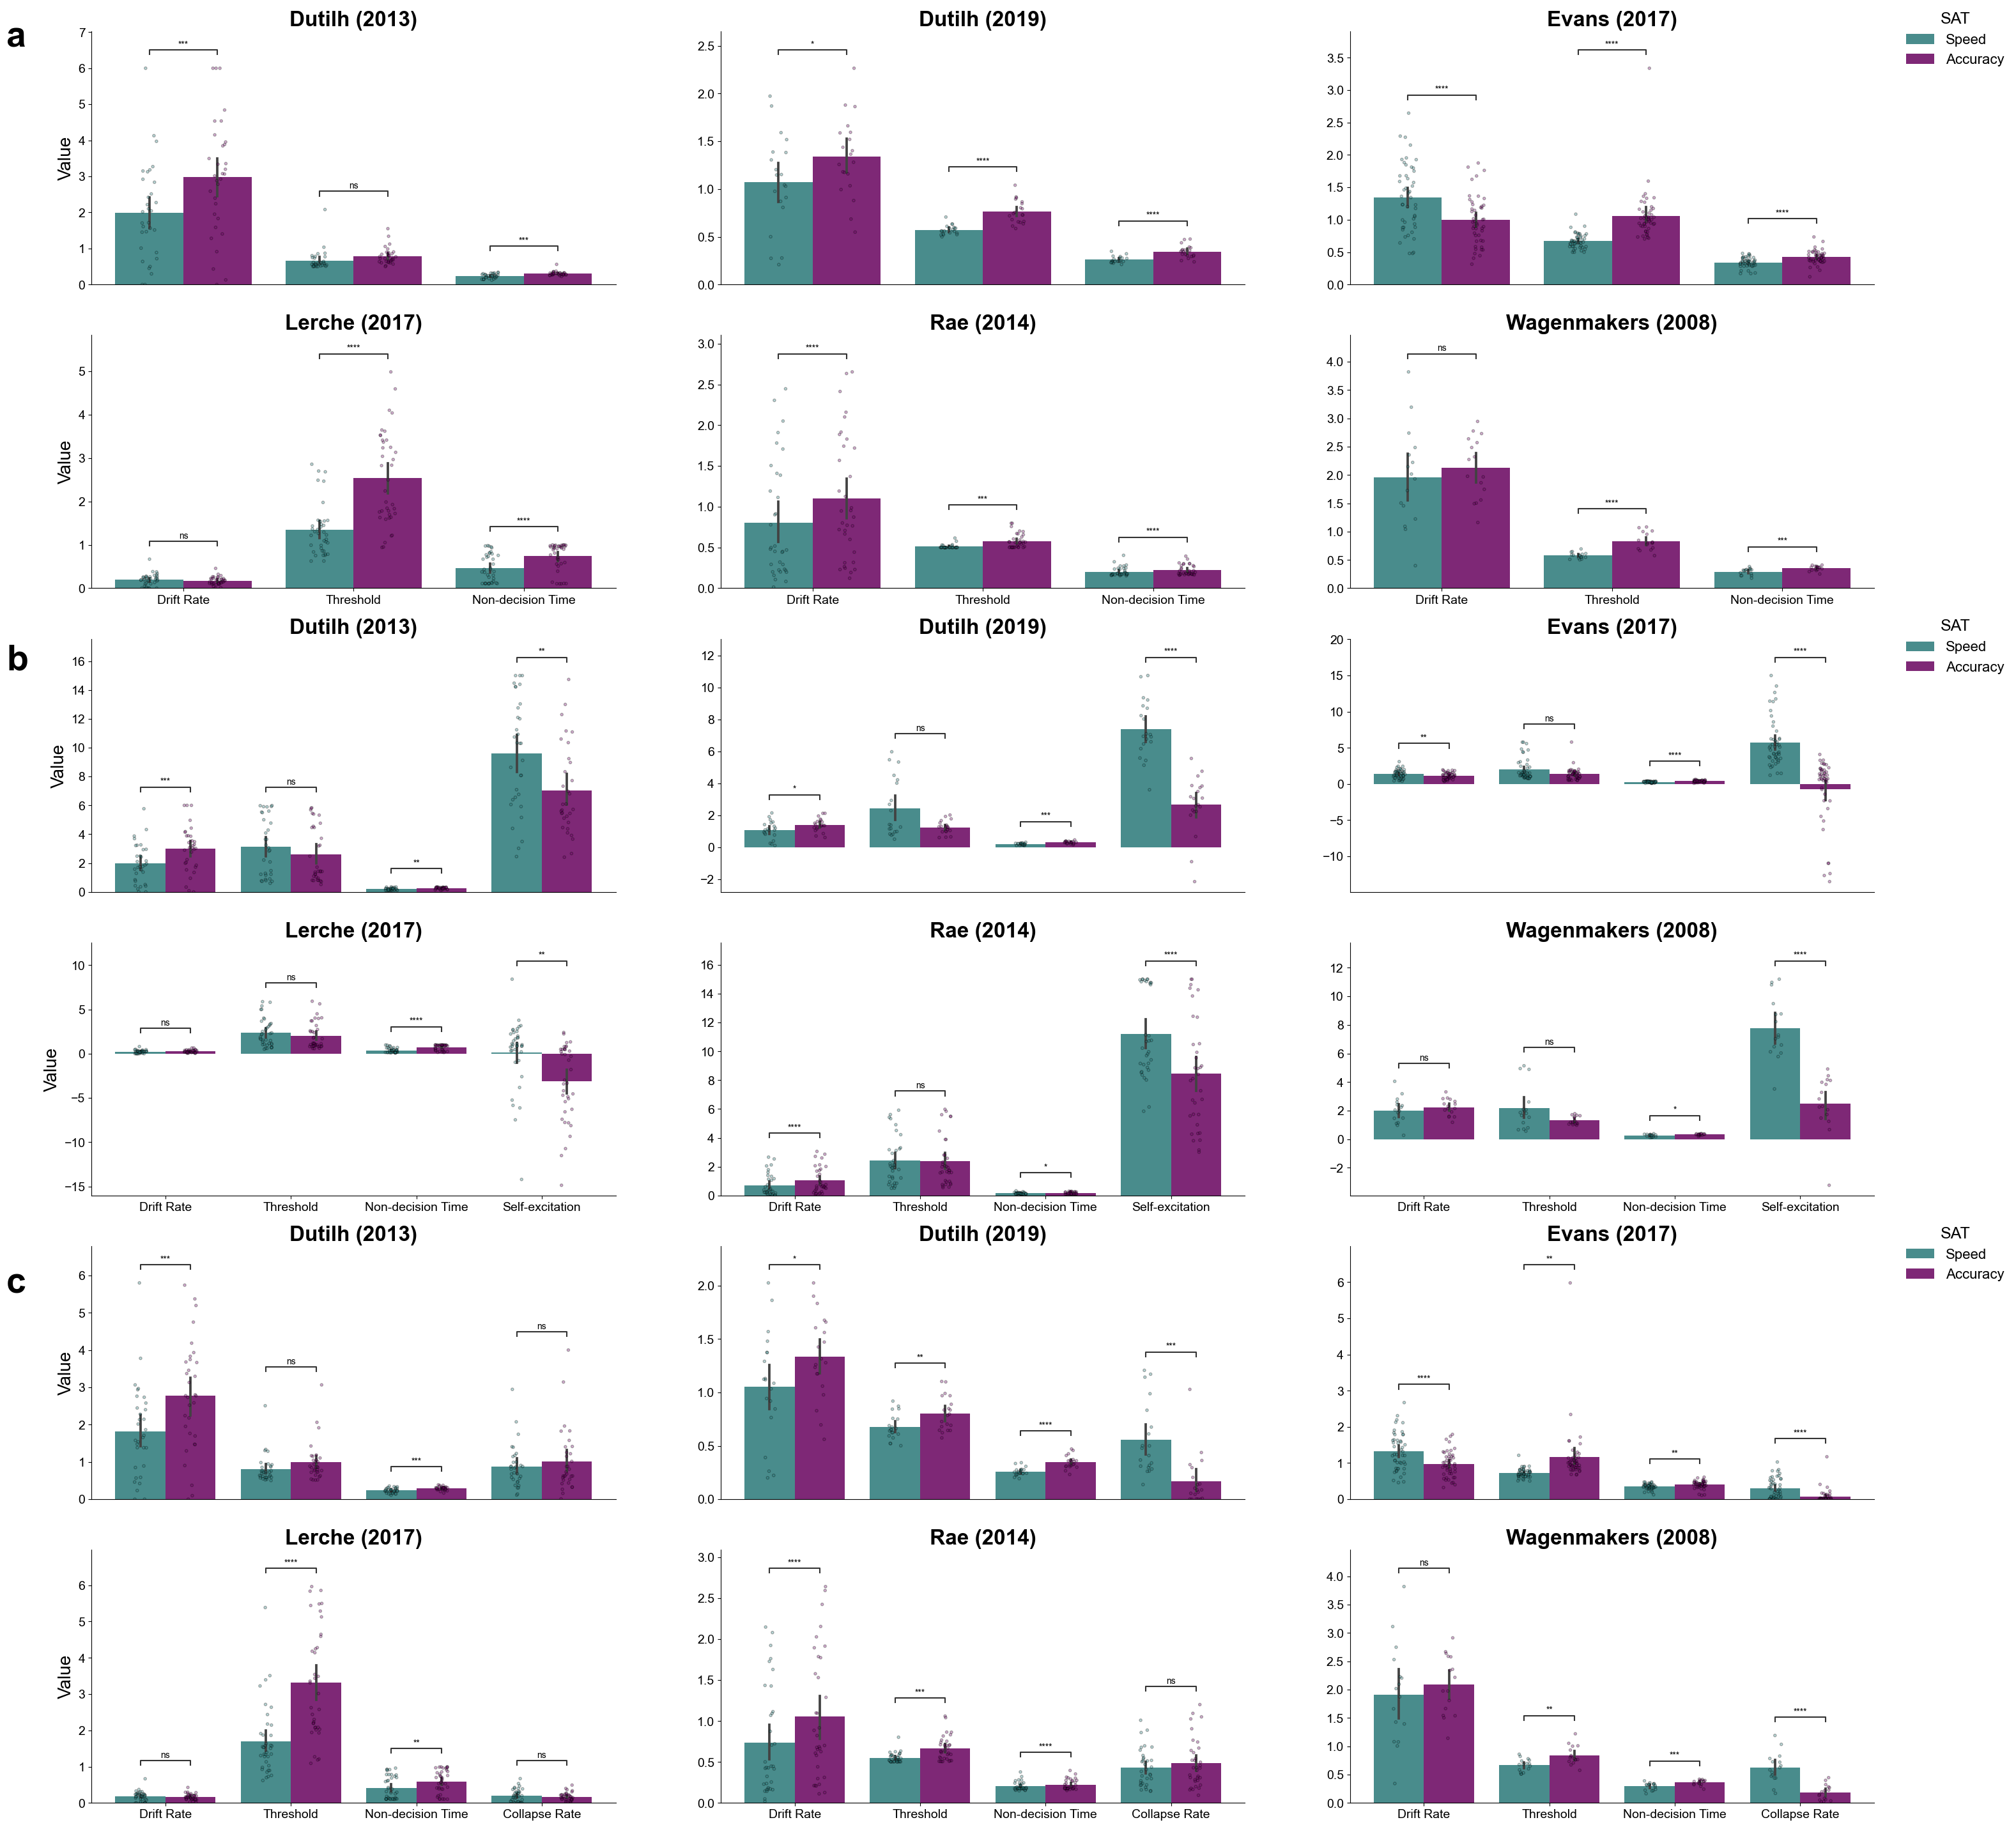

In [72]:
fig, axes = plt.subplots(6,3,figsize=(36, 36))

for i in range(6):
    axes[i,0].set_ylabel('Value', fontsize = 20)
plot_all_datasets_DDM(axes=axes[0:2,:])
plot_all_datasets_OUM(axes=axes[2:4,:])
plot_all_datasets_LCBM(axes=axes[4:6,:])

handles, labels = axes[0,2].get_legend_handles_labels()
for i in range(3):
    axes[2*i,2].legend(handles[2:4], labels[2:4], title = "SAT", bbox_to_anchor=(1.05, 1.1), loc=2, 
                     borderaxespad=0.,fontsize=16, title_fontsize = 18, frameon=False)
    #change from bound to threshold
    axes[1,i].set_xticklabels(["Drift Rate", "Threshold", "Non-decision Time"])
    axes[3,i].set_xticklabels(["Drift Rate", "Threshold", "Non-decision Time", "Self-excitation"])
    axes[5,i].set_xticklabels(["Drift Rate", "Threshold", "Non-decision Time", "Collapse Rate"])

    
plt.text(x=-11.3,y=31, s="a", fontsize = 40, weight='bold')
plt.text(x=-11.3,y=20, s="b", fontsize = 40, weight='bold')
plt.text(x=-11.3,y=9,  s="c", fontsize = 40, weight='bold')


#["Drift Rate", "Boundary Separation", "Non-decision Time", "Collapse Rate"]
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Supplementary Figures/sup_fig6.pdf")

## WCBM

In [80]:
params = ["$v$", "$a$", "$Ter$", "$a'$", "$\Lambda$","$s$"]
[((p, "Speed"),(p, "Accuracy")) for p in params]

[(('$v$', 'Speed'), ('$v$', 'Accuracy')),
 (('$a$', 'Speed'), ('$a$', 'Accuracy')),
 (('$Ter$', 'Speed'), ('$Ter$', 'Accuracy')),
 (("$a'$", 'Speed'), ("$a'$", 'Accuracy')),
 (('$\\Lambda$', 'Speed'), ('$\\Lambda$', 'Accuracy')),
 (('$s$', 'Speed'), ('$s$', 'Accuracy'))]

In [81]:
def transform_df_WCBM(df_SAT):
    
    params = ["$v$", "$a$", "$Ter$", "$a'$", "$\lambda$","$s$"]

    df_SAT1 = df_SAT[["Drift Rate Speed", "Boundary Separation Speed", "Non-decision Time Speed","aprimeSpeed", "lamSpeed","kSpeed"]]
    df_SAT1 = pd.DataFrame(np.array(df_SAT1), columns = params)
    df_SAT1["SAT"] = ["Speed"]*len(df_SAT1)

    df_SAT2 = df_SAT[["Drift Rate Accuracy", "Boundary Separation Accuracy", "Non-decision Time Accuracy", "aprimeAcc", "lamAcc","kAcc"]]
    df_SAT2 = pd.DataFrame(np.array(df_SAT2), columns = params)
    df_SAT2["SAT"] = ["Accuracy"]*len(df_SAT2)
    df_SAT = pd.concat((df_SAT1,df_SAT2))
    df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], value_vars=params,
                        var_name = "Parameter", value_name = "Value")
    return df_SAT_melted

def plot_dataset_WCBM(dataset, dataset_name, ax=None, comparisons_correction = "bonferroni"):
    if ax is None:
        ax = plt.gca()
    df_SAT = pd.read_csv('Parameter Estimates/DDM2v2a2Weibull2terresult'+dataset+'.csv')
    #print(df_SAT)
    if dataset =='Wagenmakers2008':
        df_SAT = df_SAT.groupby(by="Participant").mean()
    df_SAT_melted = transform_df_WCBM(df_SAT)
    params = ["$v$", "$a$", "$Ter$", "$a'$", "$\lambda$","$s$"]

    OUMbox_pairs=[((p, "Speed"),(p, "Accuracy")) for p in params]

    #print(df_SAT_melted)
    sns.barplot(ax = ax, data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", hue_order=["Speed","Accuracy"],
               palette= ["#298c8c",'#800074'],alpha=.9)
    sns.stripplot(ax = ax, data=df_SAT_melted, x="Parameter", y="Value",hue = "SAT", palette=["#298c8c",'#800074'], 
                  alpha=.3,edgecolor="black",linewidth=1,size = 3, dodge=True)
    ax.legend_.remove()
    
    annotator = Annotator(ax, OUMbox_pairs, data=df_SAT_melted, x="Parameter", y="Value", hue="SAT")
    annotator.configure(test='t-test_paired', text_format='star',comparisons_correction="Bonferroni") #, loc='outside'
    annotator.apply_and_annotate()
    
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(dataset_name[:-4] + " "+"("+dataset_name[-4:] + ")", weight='bold', fontsize = 24)
    ax.spines[['right', 'top']].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=14)
    
    return ax

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

$a$_Speed vs. $a$_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.000e+00 t=-8.370e-01
$v$_Speed vs. $v$_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.169e-03 t=-4.225e+00
$Ter$_Speed vs. $Ter$_Accuracy: t-test paired samples with Bonferroni correction, P_val:5.759e-05 t=-5.281e+00
$a'$_Speed vs. $a'$_Accuracy: t-test paired samples with Bonferroni correction, P_val:3.339e-01 t=-1.988e+00
$\lambda$_Speed vs. $\lambda$_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.000e+00 t=-6.377e-01
$s$_Speed vs. $s$_Accuracy: t-test paired samples with Bonferroni correction, P_val:1.000e+00 t=-1.782e-02
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
   

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


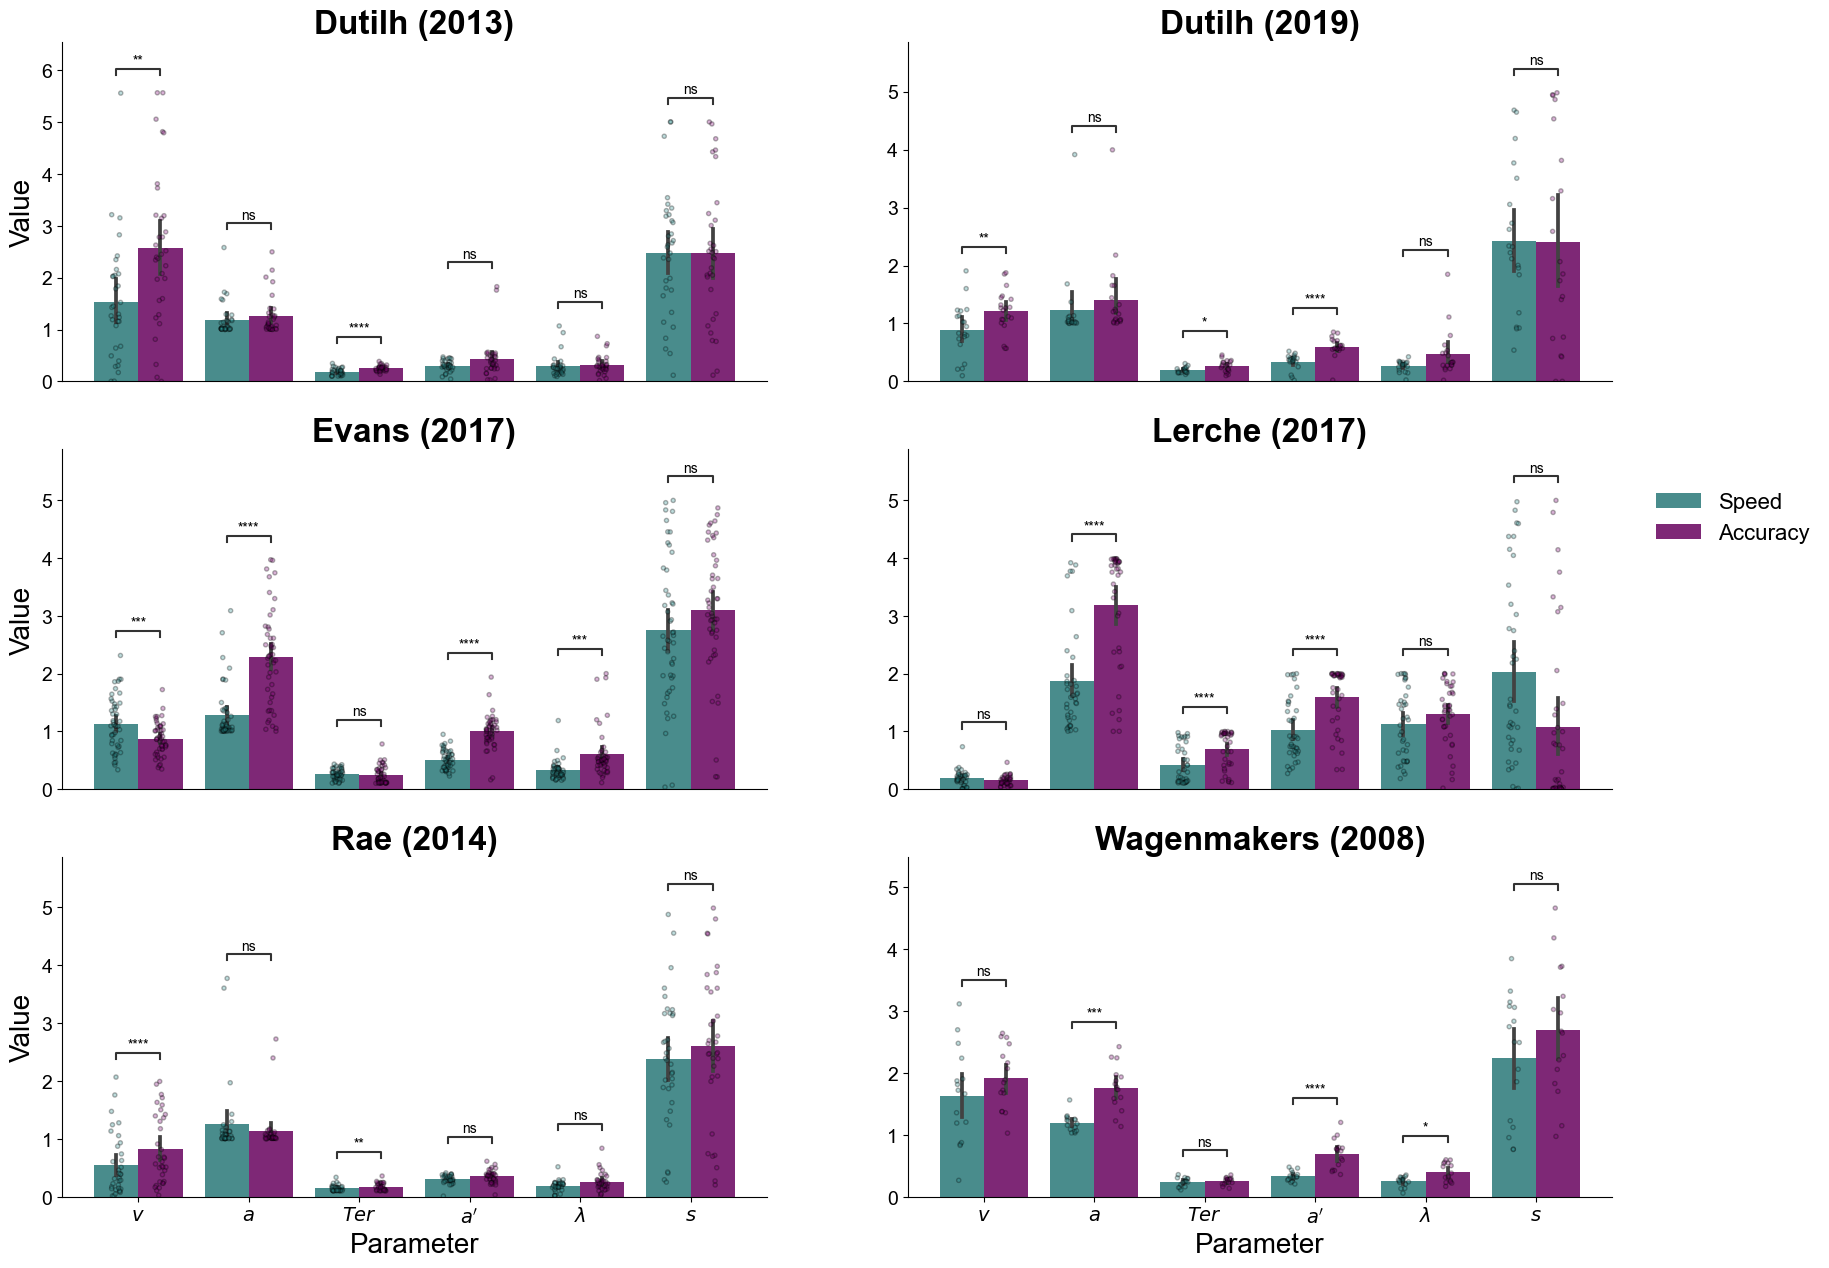

In [82]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']

fig, axes = plt.subplots(3,2,figsize=(20, 15))

plot_dataset_WCBM(dataset = datasets[0], dataset_name = dataset_names[0], ax=axes[0,0])
plot_dataset_WCBM(dataset = datasets[1], dataset_name = dataset_names[1], ax=axes[0,1])
plot_dataset_WCBM(dataset = datasets[2], dataset_name = dataset_names[2], ax=axes[1,0])
plot_dataset_WCBM(dataset = datasets[3], dataset_name = dataset_names[3], ax=axes[1,1])
plot_dataset_WCBM(dataset = datasets[4], dataset_name = dataset_names[4], ax=axes[2,0])
plot_dataset_WCBM(dataset = datasets[5], dataset_name = dataset_names[5], ax=axes[2,1])




    
axes[0,0].tick_params(bottom = False,labelbottom = False)
axes[0,1].tick_params(bottom = False,labelbottom = False)
axes[1,0].tick_params(bottom = False,labelbottom = False)
axes[1,1].tick_params(bottom = False,labelbottom = False)

axes[2,0].set_xlabel('Parameter', fontsize = 20)
axes[2,1].set_xlabel('Parameter', fontsize = 20)

axes[0,0].set_ylabel('Value', fontsize = 20)
axes[1,0].set_ylabel('Value', fontsize = 20)
axes[2,0].set_ylabel('Value', fontsize = 20)

# When creating the legend, only use the first two elements
handles, labels = axes[0,0].get_legend_handles_labels()
l = plt.legend(handles[2:4], labels[2:4], bbox_to_anchor=(1.05, 2.1), loc=2, borderaxespad=0.,fontsize=16, frameon=False)

plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42

plt.savefig("/Users/wangjiashun/Desktop/Research_on_SAT/Draft/Supplementary Figures/sup_fig7.pdf")